# PEiAR Laboratorium 9

Test zgodności - testuje hipotezę na temat 2 prób  
Testy niezależności - testuje czy 2 próby są od siebie niezależne statystycznie

Test serii Walda-Wolfowitza - może być wykorzystywany do zgodności i niezależności
* weryfikowana jest losowość próby - czy mają rozkład jednostajny - sprawdza ile wartości jest większa, albo mniejsza od mediany, liczy się nie tylko ilość, ale też położenie - porównanie z wartością 
* weryfikacja zgodności rozkładów - konkatenacja wektorów, sortowanie, porównanie wartości

### Zad.1 (W jaki sposób działa test serii Walda-Wolfowitza? Kiedy go wykorzystujemy?)
Z urny zawierającej 100 kul ponumerowanych losujemy 10 kul kolejno bez zwracania. Które z następujących prób można uznać za losowe? Skorzystaj z paczki ‘randtests’ i użyj testu serii.  
[a] 5, 17, 21, 29, 33, 45, 56, 66, 72, 88  
[b] 45, 12, 77, 64, 4, 93, 21, 37, 90, 95  
[c] 63, 90, 47, 16, 86, 74, 97, 13, 26, 3  
[d] 1, 81, 11, 21, 91, 71, 31, 61, 41, 51  

In [20]:
library('randtests')
a_ <- c(5, 17, 21, 29, 33, 45, 56, 66, 72, 88)
b_ <- c(45, 12, 77, 64, 4, 93, 21, 37, 90, 95)
c_ <- c(63, 90, 47, 16, 86, 74, 97, 13, 26, 3)
d_ <- c(1, 81, 11, 21, 91, 71, 31, 61, 41, 51)
v_ <- list(a_, b_, c_, d_)
for(i in v_) {
  print(runs.test(i))
}


	Runs Test

data:  i
statistic = -2.6833, runs = 2, n1 = 5, n2 = 5, n = 10, p-value =
0.00729
alternative hypothesis: nonrandomness


	Runs Test

data:  i
statistic = 0, runs = 6, n1 = 5, n2 = 5, n = 10, p-value = 1
alternative hypothesis: nonrandomness


	Runs Test

data:  i
statistic = -1.3416, runs = 4, n1 = 5, n2 = 5, n = 10, p-value = 0.1797
alternative hypothesis: nonrandomness


	Runs Test

data:  i
statistic = 1.3416, runs = 8, n1 = 5, n2 = 5, n = 10, p-value = 0.1797
alternative hypothesis: nonrandomness



### Zad.2
Zmierzono wzrost studentów I roku Informatyki:
176, 182.5, 166, 175, 175.5, 161.5, 173, 165, 186, 170.5, 158, 163.5  
oraz wzrost studentów II roku Informatyki:
168, 172, 163, 171.5, 177, 190, 172.5, 164, 183.5, 171, 157.5, 166.  
Czy można twierdzić że wzrost studentów I roku ma ten sam rozkład co wzrost studentów II roku? Przeprowadź test Kołmogorowa-Smirnowa oraz test serii.

In [21]:
y1_ <- c(176, 182.5, 166, 175, 175.5, 161.5, 173, 165, 186, 170.5, 158, 163.5)
y2_ <- c(168, 172, 163, 171.5, 177, 190, 172.5, 164, 183.5, 171, 157.5, 166)
ks.test(y1_, y2_)


	Exact two-sample Kolmogorov-Smirnov test

data:  y1_ and y2_
D = 0.25, p-value = 0.869
alternative hypothesis: two-sided


W przypadku testu serii, najpierw utwórz ramkę frame_ z kolumną ‘Height’ przechowującą skonkatenowane oba wektory firstYear_ oraz secondYear_. Następnie dołącz kolumnę ‘Year’ z pierwszymi dwunastoma wartościami: 1 oraz
dwunastoma kolejnymi: 2. Dalej, uporządkuj ramkę rosnąco według wzrostu. Można to zrobić używając funkcji order() w następujący sposób: `frame_ = frame_[order(frame_$Height), ]`  
Uwaga: ważne jest by nie pominąć przecinka przed kwadratowym nawiasem zamykającym. Puste miejsce oznacza, że domyślnie, po uporządkowaniu ramki, chcemy widzieć wszystkie jej kolumny
(np. argument c(1, 3), spowodowałby widok jedynie pierwszej i trzeciej kolumny w uporz. ramce). Na końcu użyj testu serii na wektorze wartości z kolumny ‘Year’ uporządkowanej uprzednio ramki.

In [22]:
frame_ <- data.frame('Height' = c(y1_, y2_))
frame_$Year <- rep(1:2, each = 12)
frame_ = frame_[order(frame_$Height),]
runs.test(frame_$Year)


	Runs Test

data:  frame_$Year
statistic = 0.83485, runs = 15, n1 = 12, n2 = 12, n = 24, p-value =
0.4038
alternative hypothesis: nonrandomness


### Zad.3 (Testy niezależności: χ2 i Fishera)

Test χ2 Pearsona niezależności (dwóch cech) - tabelka korelacyjna (kontyngencji) - liczebność empiryczna, łączna, brzegowa - oparty jest na porównaniu liczności empirycznej z teoretyczną

Test Fishera - ratunek przy małych wymiarach tabelki kontyngencji

W pewnej grupie społecznej zbadano wykształcenie i częstość chodzenia do teatru w ciągu jednego
roku. Okazało się, że wśród osób z niższym wykształceniem, 23 osoby poszły do teatru 0 razy, 18
osób 1 raz natomiast 28 osób 2 razy.
Wśród osób ze średnim wykształceniem: 15 nie było w teatrze w danym roku ani raz, 30 osób było
1 raz i 11 osób było 2 razy. Natomiast wśród osób z wyższym wykształceniem 8 osób było 0 razy,
22 osoby 1 raz i 31 osób 2 razy.
Przy użyciu testu χ2 Pearsona (tego zwykłego oraz tego z paczki ‘TeachingDemos’) zweryfikuj
hipotezę o niezależności częstotliwości uczęszczania do teatru od wykształcenia respondentów.

In [23]:
library('TeachingDemos')
a <- rbind(c(23, 18, 28), c(15, 30, 11), c(8, 22, 31))
chisq.test(a)
chisq.detail(a)


	Pearson's Chi-squared test

data:  a
X-squared = 19.546, df = 4, p-value = 0.0006137




observed
expected

                        Total
      23    18    28       69
      17.06 25.97 25.97      
                             
      15    30    11       56
      13.85 21.08 21.08      
                             
       8    22    31       61
      15.09 22.96 22.96      
                             
Total 46    70    70      186


Cell Contributions
                           
 2.06 + 2.44 + 0.16 +      
 0.10 + 3.78 + 4.82 +      
 3.33 + 0.04 + 2.82 = 19.55

df = 4  P-value = 0.001 



In [24]:
fisher.test(a)


	Fisher's Exact Test for Count Data

data:  a
p-value = 0.0004383
alternative hypothesis: two.sided


### Zad.4
Zbadano, że wśród studentów pewnej grupy, cztery kobiety myją zęby 1 raz w tygodniu, dwie 3 razy i pięć 7 razy w tygodniu. Podobnie, 6 mężczyzn myje zęby 1 raz w tygodniu, czterech 3 razy i
jeden pan myje zęby codziennie. Zweryfikuj hipotezę o niezależności płci w tej grupie od dbania o higienę jamy ustnej. 

In [25]:
a <- matrix(c(4, 2, 5, 6, 4, 1), 2, 3)
chisq.test(a)
fisher.test(a)

Warning message in chisq.test(a):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  a
X-squared = 1.8929, df = 2, p-value = 0.3881



	Fisher's Exact Test for Count Data

data:  a
p-value = 0.5356
alternative hypothesis: two.sided


### Zad.5 (Wykresy - ciąg dalszy…)
Narysuj wykres funkcji y = x·sin(x) na przedziale [-30, 30].

I sposób:
wykonamy zadanie używając funkcji `curve(...)`. Zdefiniuj powyższą funkcję pod zmienną `fun_` i
wywołaj polecenie `curve()` z szeregiem doprecyzowujących argumentów:
```
type = ... // ‘l’, ‘s’, ‘o’, ‘h’, ‘c’,..., domyślnie ‘l’//
from =..., to=... // równoważnie xlim=c(..., ...) //
n =... // 101 domyślnie // 
ylim =... // ustaw [-50, 50]
cex.axis =...// 1 domyślnie //
lwd=...// 1 domyślnie (wartości naturalne) //
bty=... // ’o’, ‘n’, ‘u’, domyślnie ‘o’ //
lty=... // 1, 2, 3, 4, 5, 6 (domyślnie 1) //
xlab=...,
main=...,
col=...// 1, 2, 3, 4, 5, ... (domyślnie 1) //
```
Poeksperymentuj z wartościami parametrów aby domyślić się za co odpowiadają.
Dorysuj na wykresie dwie przerywane proste y = x oraz y = - x stykające się z lokalnymi
ekstremami badanej funkcji. Użyj w tym celu funkcji abline(...) // której kiedyś używaliśmy do
rysowania poziomej linii na zadanej wysokości: abline(h=...) //przyjmującej tym razem – jako
swoje dwa pierwsze argumenty – najpierw (!) współczynnik b oraz współczynnik a funkcji liniowej
y = ax + b, której wykres ma zostać narysowany.
Chcemy też aby znaki podpisujące oś pionową ułożone były poziomo, w tym celu w definicji
wykresu dodaj kolejny argument las = 1 (możliwe wartości 0, 1, 2 lub 3).
Na końcu, chcemy do rysunku dodać informację tekstową (ze strzałką) wskazującą na to że
wypoziomowaliśmy znaki podpisujące pionową oś. W tym celu rysujemy strzałę:
`arrows(..arg1.., ..arg2.., ..arg3.., ..arg4.., angle = 20, length = 0.15, code = 2, lwd = 2, col = 4)`
// najważniejsze są tu cztery pierwsze argumenty stanowiące współrzędne początku strzały (dwa
pierwsze argumenty) oraz współrzędne końca strzały (dwa kolejne argumenty) // a potem
umieszczamy tekst poleceniem:
`text(..arg1.., ..arg2.., labels=’...treść annotacji…’)`

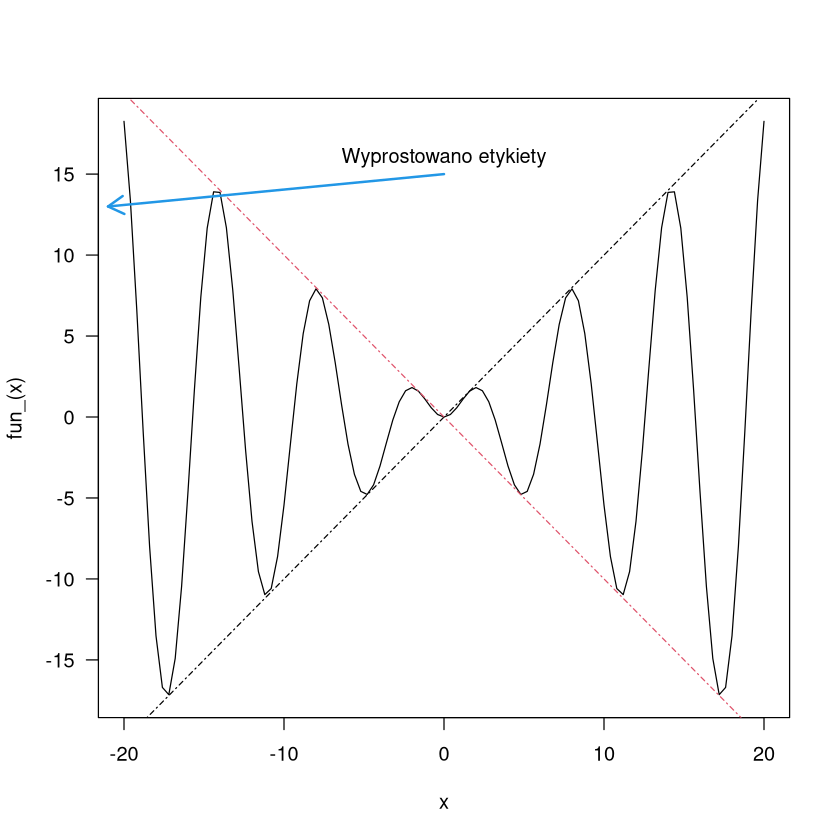

In [26]:
fun_ <- function(x) {
  return(x * sin(x))
}
curve(fun_(x), from = -20, to = 20, las = 1)
abline(0, 1, lty = 4)
abline(0, -1, lty = 4, col = 2)
text(0, 16, "Wyprostowano etykiety")
arrows(0, 15, -21, 13, angle = 30, length = 0.15, code = 2, lwd = 2, col = 4)

II sposób:
użyjemy paczki ‘ggplot2’. W celu wygenerowania dowolnego wykresu trzeba najpierw zdefiniować
jego bazę / konstruktor:
`base_ = ggplot(data.frame(x = c(-30, 30)), aes(x))`
Następnie, zbudujmy na zdefiniowanym konstruktorze wykres funkcji fun_:
`plot_ = base_ + stat_function(fun = fun_, geom = ‘line’, n = 100)`
Dalej, naniesiemy na istniejący już wykres, nowy zielony punktowy wykres funkcji wartość
bezwzględna:
`plot_1 = plot_ + stat_function(fun = abs, geom = ‘point’, n = 100, colour = ‘green’)`
i jeszcze czerwony schodkowy wykres funkcji cosinus
`plot_2 = plot_1 + stat_function(fun = cos, geom = ‘step’, n = 60, colour = ‘red’)`

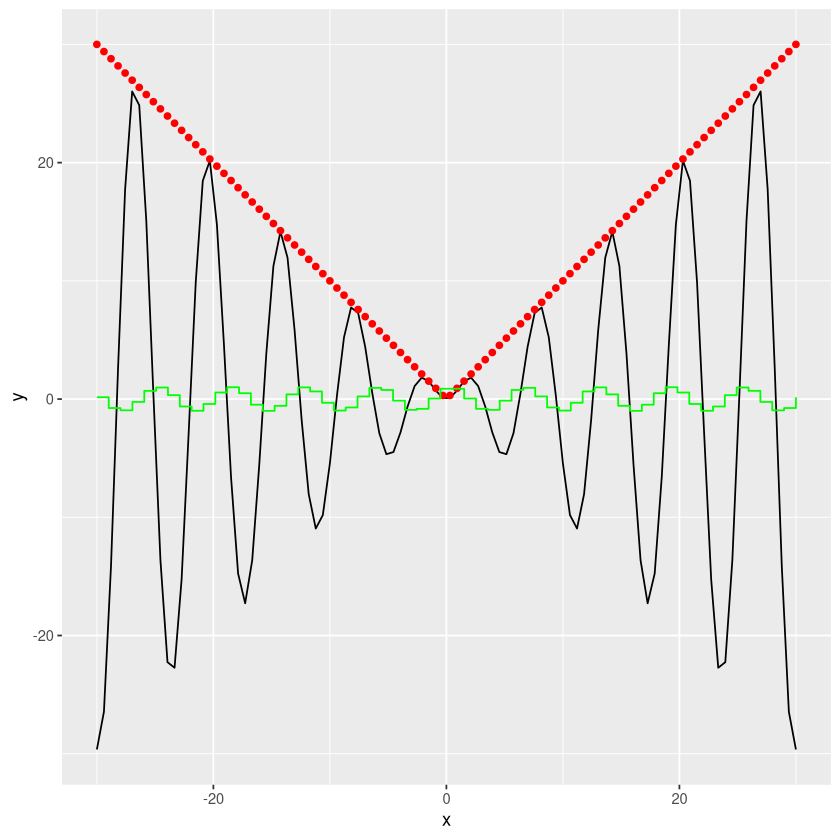

In [27]:
library(ggplot2)
base_ <- ggplot(data.frame(x = c(-30, 30)), aes(x))
plot_ <- base_ + stat_function(fun = fun_, geom = 'line', n = 100)
plot_1 <- plot_ + stat_function(fun = abs,
  geom = 'point', n = 100, colour = 'red')
plot_2 <- plot_1 + stat_function(fun = cos,
  geom = 'step', n = 60, colour = 'green')
plot_2

Narysuj poznanymi sposobami wykresy funkcji:
a) y =
|(log3(x−2)+ln(x−4))|/2 na przedziale [4, 30]k


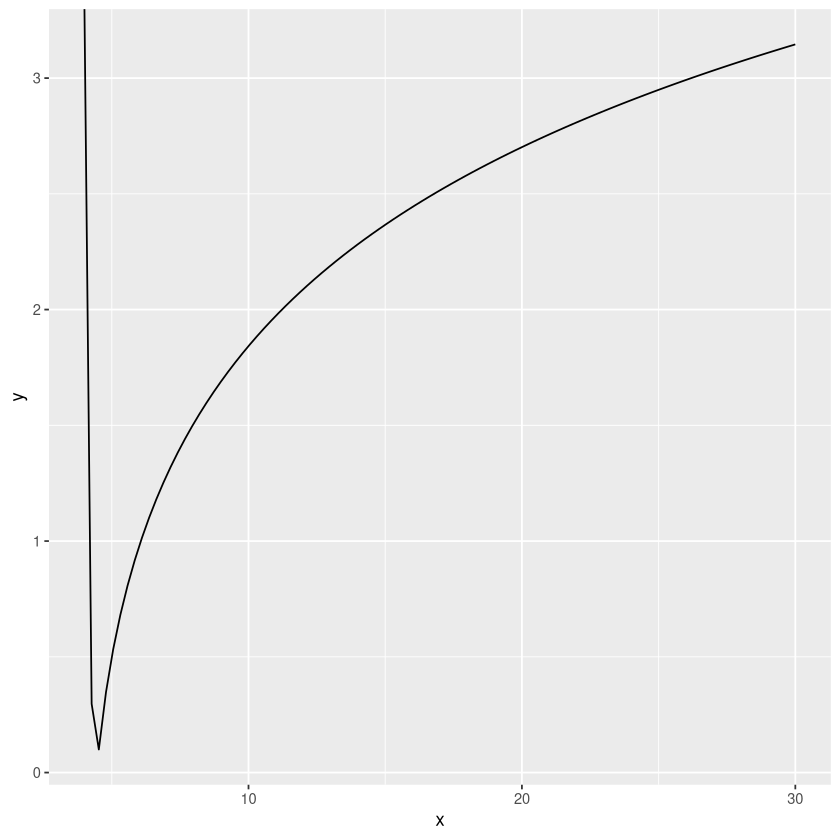

In [28]:
fun_ <- function(x) {
   return(abs(log(x - 2, 3) + log(x - 4)) / 2)
}
base_ <- ggplot(data.frame(x = c(4, 30)), aes(x))
plot_ <- base_ + stat_function(fun = fun_, geom = 'line', n = 100)
plot_

b) y = e⌊sin(2 x)⋅cos(2 x)⌋ na przedziale [-20, 20]

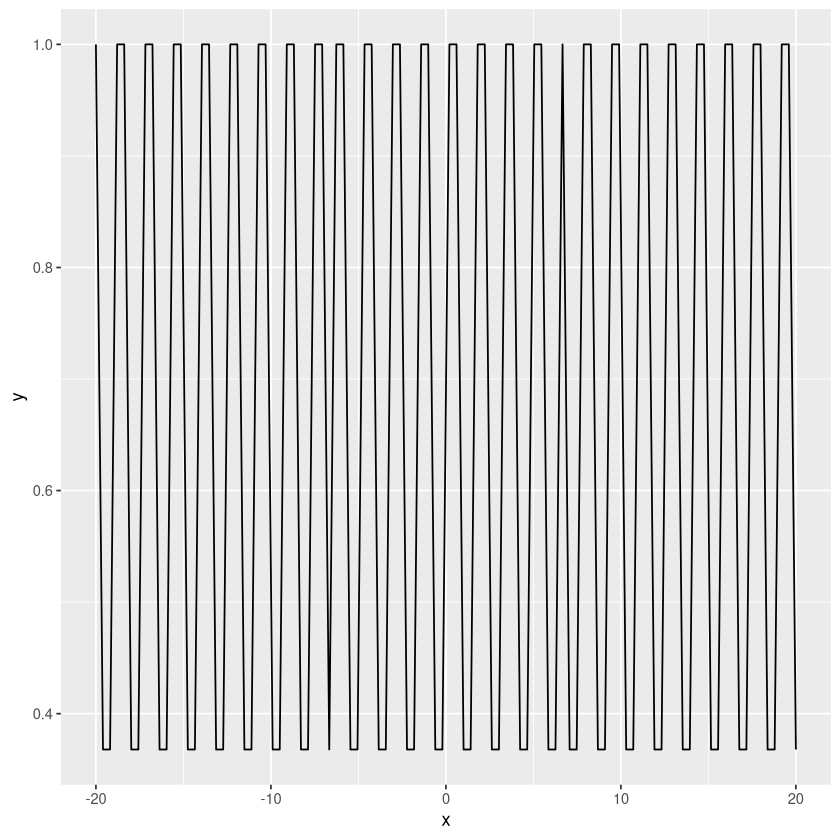

In [29]:
fun_ <- function(x) {
   return(exp(floor(sin(2 * x) * (cos(2 * x)))))
}
base_ <- ggplot(data.frame(x = c(-20, 20)), aes(x))
plot_ <- base_ + stat_function(fun = fun_, geom = "line", n = 100)
plot_

### Zad.6 (Testy zgodności – dla więcej niż 2 prób…)
Pewna ciągła cecha X została zbadana na losowo wybranych osobnikach w czterech różnych
populacjach. Zweryfikuj hipotezę, że rozkłady tej cechy we wszystkich czterech populacjach są
identyczne.
Otrzymano próbki:  
x1: 11.2, 5, 45, 3.42, 24, 54, 33.5, 18  
x2: 72.5, 6, 22.4, 70, 101, 23, 42, 33  
x3: 32, 44.6, 44.9, 64, 2.3, 8, 93, 100, 22, 34  
x4: 20, 19, 18, 2, 3.6, 4.6, 8  
Użyj testu Kruskala – Wallisa o identyczności rozkładów.
Uwaga – jako argument należy podać listę zbudowaną ze wszystkich próbek
`kruskal.test(list_)`
Zilustruj otrzymany wynik testu przy użyciu wykresu pudełkowego dla analizowanej listy, np.:
`boxplot(list_, boxwex=0.7, las=1, col=4)`

In [30]:
a <- list(c(11.2, 5, 45, 3.42, 24, 54, 33.5, 18),
c(72.5, 6, 22.4, 70, 101, 23, 42, 33),
c(32, 44.6, 44.9, 64, 2.3, 8, 93, 100, 22, 34),
c(20, 19, 18, 2, 3.6, 4.6, 8))
kruskal.test(a)


	Kruskal-Wallis rank sum test

data:  a
Kruskal-Wallis chi-squared = 9.5783, df = 3, p-value = 0.02251


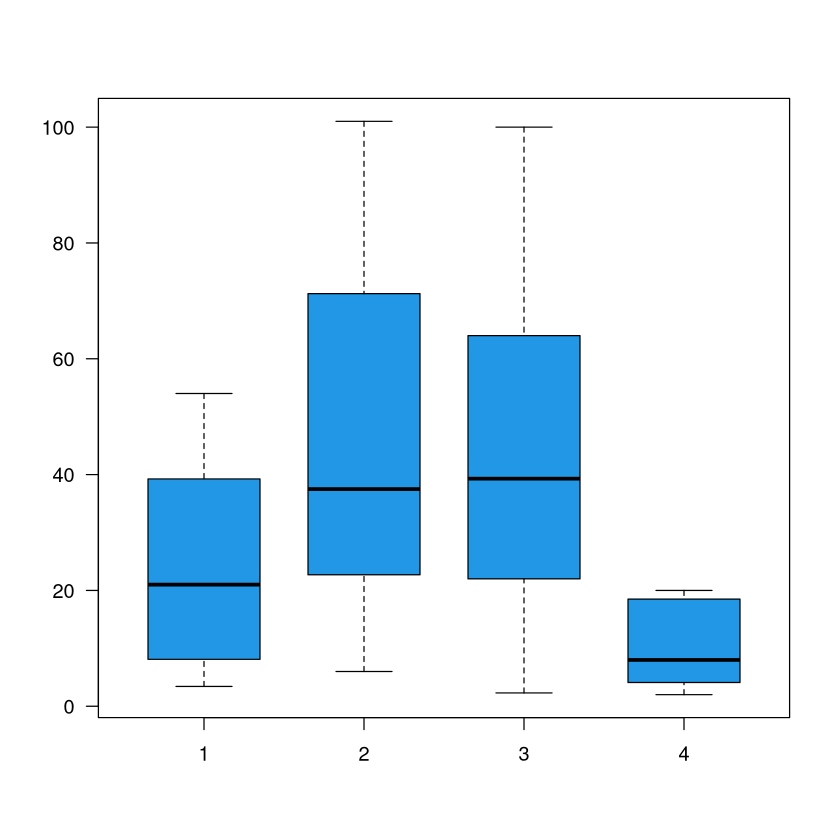

In [31]:
boxplot(a, boxwex = 0.7, las = 1, col = 4)